## Visualize training curve for optimal bVAE

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(reshape2))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(cowplot))

In [2]:
# Set file paths
training_file <- file.path("..", "results", "beta_vae_training_history.csv")
output_file <- file.path("figures", "optimal_beta_vae_training_curves.png")

In [3]:
# Load and process training history (in preparation for plotting)
train_df <- readr::read_csv(
    training_file, col_types = readr::cols(.default="d")
) %>%
    dplyr::mutate(epoch = dplyr::row_number()) %>%
    dplyr::select(loss, val_loss, epoch) %>%
    reshape2::melt(
        id.vars = "epoch",
        value.vars = c("loss", "val_loss"),
        value.name = "loss",
        variable.name = "loss_type"
    )

print(dim(train_df))
head(train_df, 3)

[1] 1810    3


,epoch,loss_type,loss
,<int>,<fct>,<dbl>
1,1,loss,319.3820
2,2,loss,228.2752
3,3,loss,175.7718


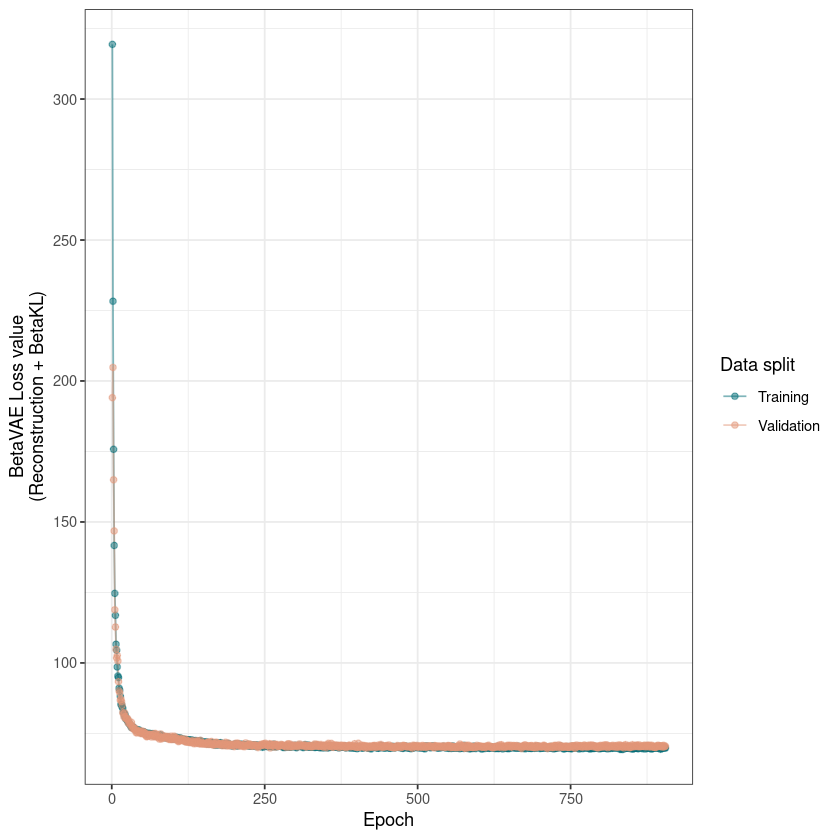

In [4]:
# Visualize the training curves
curve_labels <- c("loss" = "Training", "val_loss" = "Validation")
curve_colors <- c("loss" = "#006D77", "val_loss" = "#E29578")
xlab_ <- "Epoch"
alpha_val <- 0.5
point_size <- 0.7

full_gg <- (
    ggplot(train_df, aes(x = epoch, y = loss, color = loss_type))
    + geom_line(alpha = alpha_val)
    + geom_point(alpha = alpha_val)
    + theme_bw()
    + scale_color_manual(
        name = "Data split",
        labels = curve_labels,
        values = curve_colors
    )
    + xlab(xlab_)
    + ylab("BetaVAE Loss value\n(Reconstruction + BetaKL)")
)

full_gg

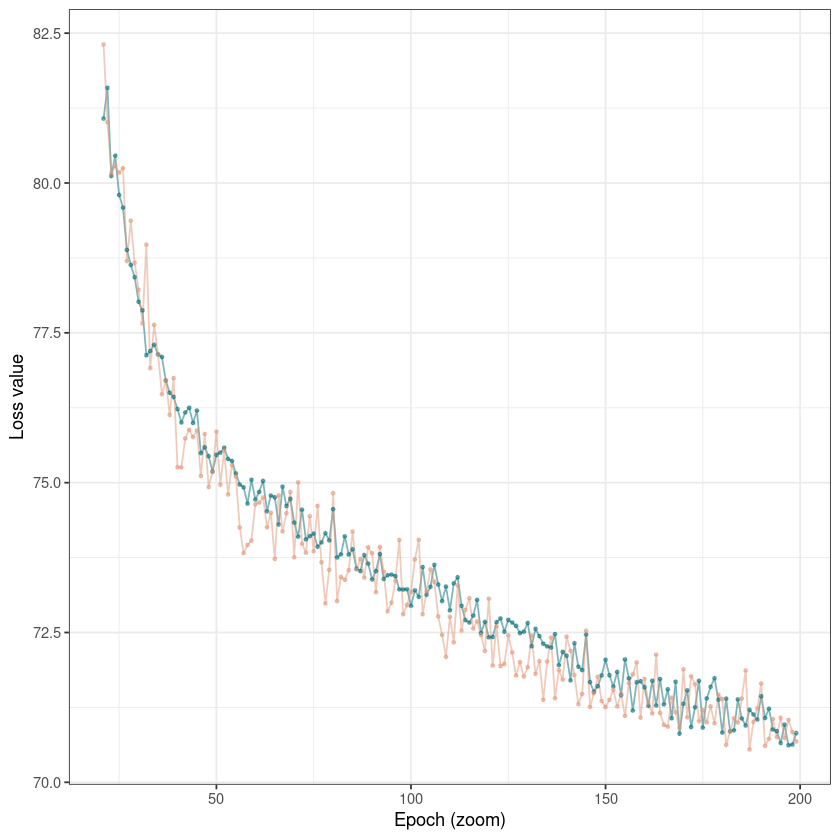

In [5]:
zoom_gg <- (
    ggplot(
        train_df %>%
            dplyr::filter(epoch > 20, epoch < 200),
        aes(x = epoch, y = loss, color = loss_type)
    )
    + geom_line(alpha = alpha_val, show.legend = FALSE)
    + geom_point(alpha = alpha_val, size = point_size, show.legend = FALSE)
    + theme_bw()
    + scale_color_manual(
        name = "",
        labels = curve_labels,
        values = curve_colors
    )
    + xlab(paste(xlab_, "(zoom)"))
    + ylab("Loss value")
)

zoom_gg

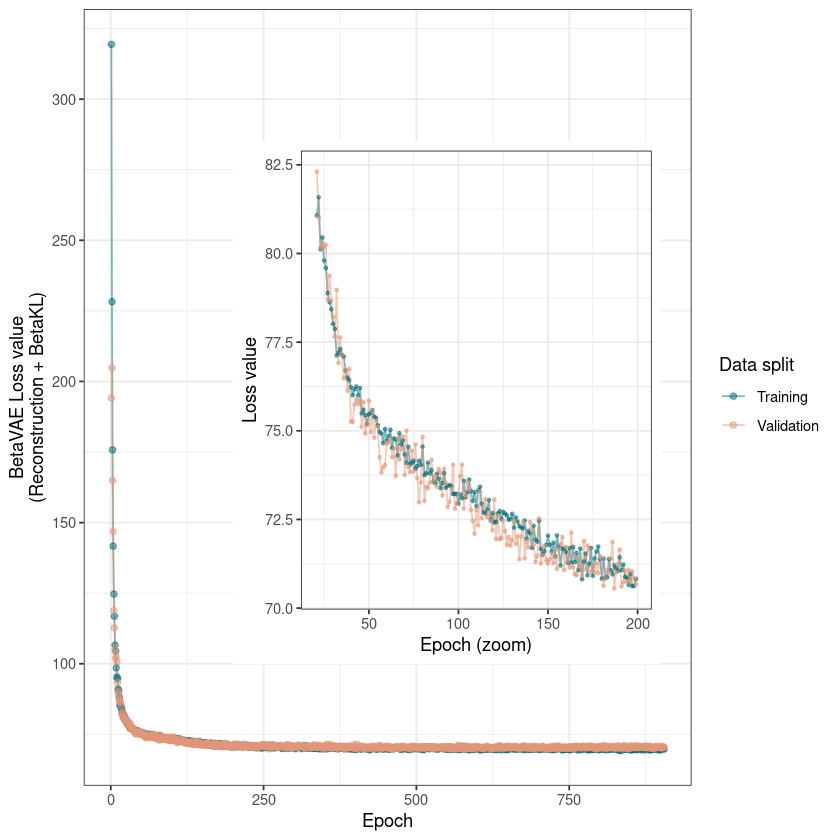

In [6]:
# Combine plots
combined_gg <- cowplot::ggdraw(
    full_gg
    + cowplot::draw_plot(
        zoom_gg,
        x = 200,
        y = 100,
        width = 700,
        height = 185
    )
)

ggsave(output_file, combined_gg, width = 4, height = 2.2, dpi = 500)

combined_gg